In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from collections import Counter
from sklearn.preprocessing import LabelEncoder,scale
import matplotlib.pyplot as plt
import xgboost

In [91]:
data=pd.read_csv(r"C:\Users\Lenovo\Downloads\updated_holiday_data.csv")

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [93]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [94]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [95]:
data.fillna({'temp': data['temp'].mean()}, inplace=True)
data.fillna({'rain': data['rain'].mean()}, inplace=True)
data.fillna({'snow': data['snow'].mean()}, inplace=True)

In [96]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [97]:
data['weather'] = data['weather'].fillna('Clouds')

In [98]:
print(Counter(data['weather']))

Counter({'Clouds': 15193, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, 'Smoke': 20, 'Squall': 4})


In [99]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [67]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,No Holiday,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,No Holiday,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,No Holiday,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,No Holiday,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,No Holiday,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [102]:
label_encoder=LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [90]:
data.corr()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
holiday,1.000000,-0.000472,0.000066,0.000432,-0.004328,0.007356,0.026040,0.018676
temp,-0.000472,1.000000,0.009070,-0.019758,-0.033559,0.030320,0.111811,0.130034
rain,0.000066,0.009070,1.000000,-0.000090,0.009542,-0.002247,0.003421,0.004714
snow,0.000432,-0.019758,-0.000090,1.000000,0.036662,0.016460,0.009850,0.000735
weather,-0.004328,-0.033559,0.009542,0.036662,1.000000,0.023525,-0.053575,-0.040035
date,0.007356,0.030320,-0.002247,0.016460,0.023525,1.000000,-0.009267,-0.007671
Time,0.026040,0.111811,0.003421,0.009850,-0.053575,-0.009267,1.000000,0.352401
traffic_volume,0.018676,0.130034,0.004714,0.000735,-0.040035,-0.007671,0.352401,1.000000


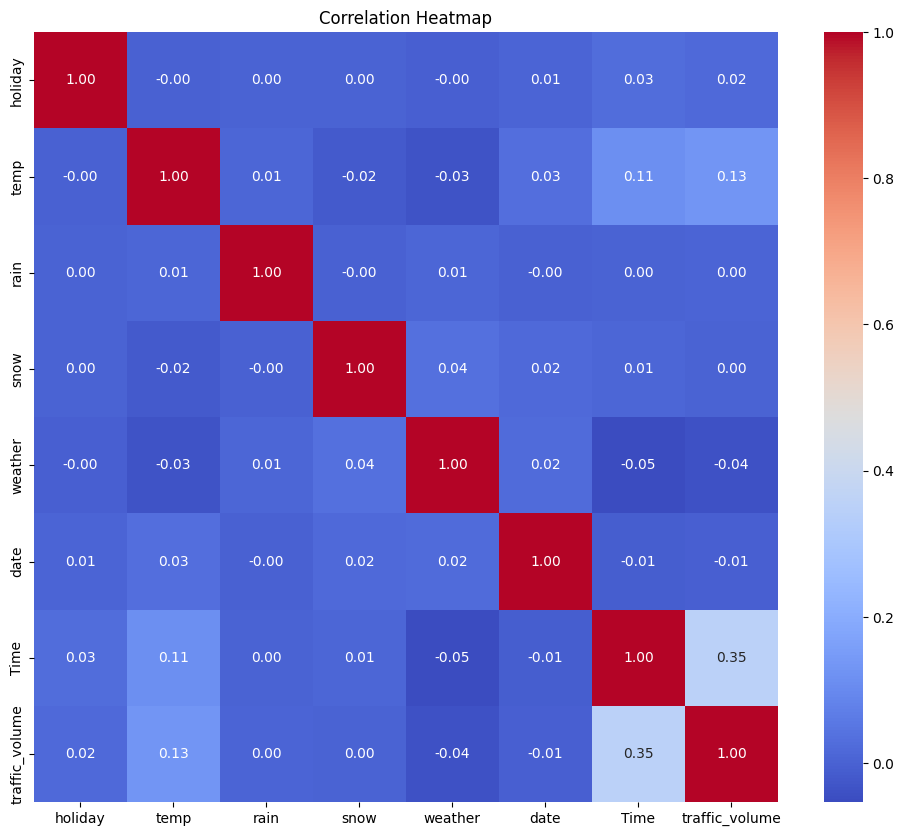

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

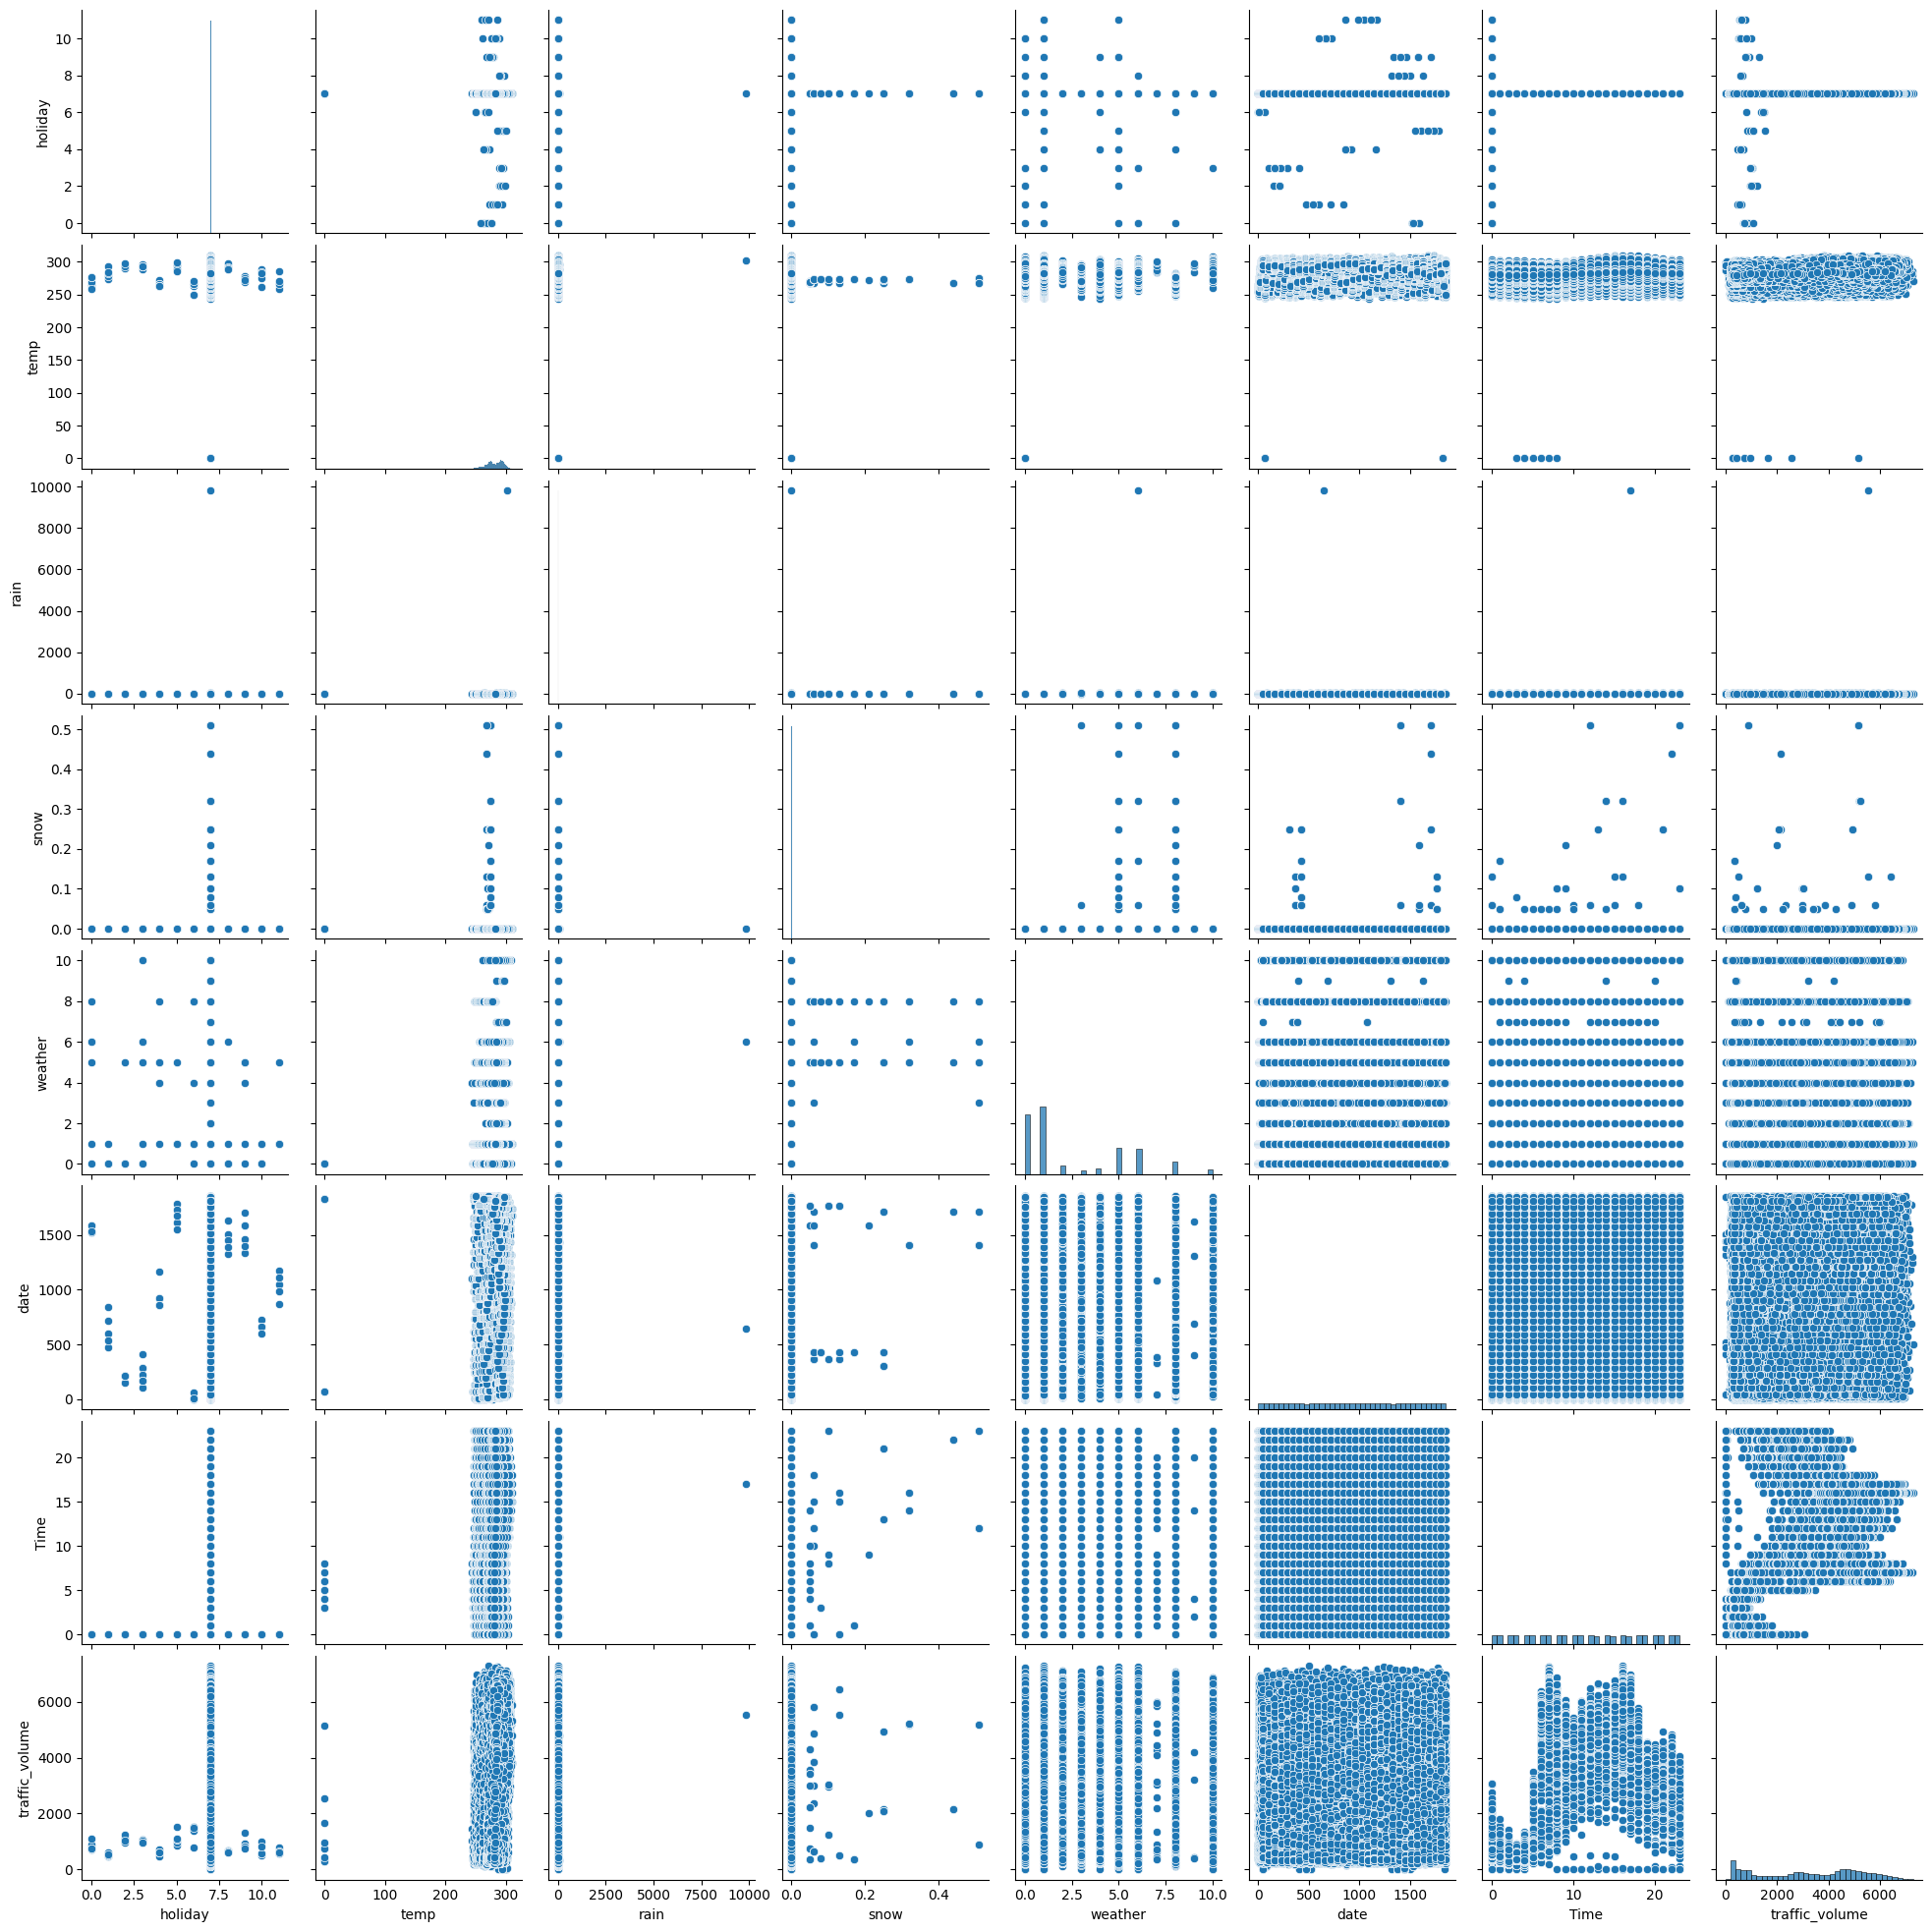

In [16]:
sns.pairplot(data)

<Axes: >

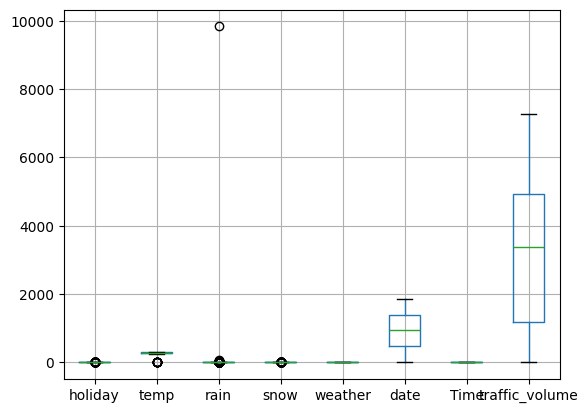

In [17]:
data.boxplot()

In [100]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)

In [101]:
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [103]:
y=data['traffic_volume']

In [104]:
x=data.drop(columns=['traffic_volume'],axis=1)
names=x.columns
x = scale(x)

In [105]:
x=pd.DataFrame(x,columns=names)

In [106]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [108]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)


In [110]:
from sklearn import metrics
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636861
1.0
0.9748012020367187
-12.188104231382269
0.8472604751586914


In [111]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [112]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.39939639832218
0.6915896314860519
0.8042886344162965
-11.972215715232418
0.8065613508224487


In [113]:
MSE=metrics.mean_squared_error(p3,y_test)

In [114]:
np.sqrt(MSE)

np.float64(796.6129158693462)

In [115]:
import pickle

In [116]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(label_encoder,open("encoder.pkl",'wb'))